In [1]:
from data_setup import create_dataloader

train_dataloader, test_dataloader = create_dataloader(train_dir="./datasets/agan/train/",
                                                      test_dir="./datasets/agan/test_a",
                                                      train_batch_size=32,
                                                      test_batch_size=16)

next(iter(train_dataloader))[0].shape, next(iter(test_dataloader))[0].shape

(torch.Size([32, 3, 480, 480]), torch.Size([16, 3, 480, 480]))

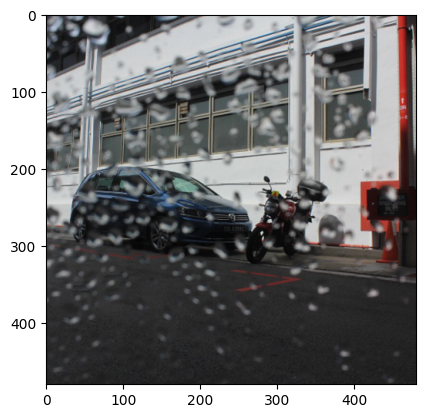

In [10]:
import matplotlib.pyplot as plt
import numpy as np

mean, std = 0.5, 0.5
img = (next(iter(train_dataloader))[0])[0, :, :, :]
img = img.squeeze().permute(1,2,0).numpy()

# normalize is (img - mean) / std
img = (img*std)+mean
img = np.round(img * 255.).astype(np.uint8)
plt.imshow(img)

In [11]:
print(img.max(), img.min())

255 0


In [12]:
import torch
from model_builder import SkipVAE
device = "cuda:3" if torch.cuda.is_available() else "cpu"

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = SkipVAE().to(device)
X = torch.randn(size=[1,3,480,480]).to(device)
output, _, _, mask = model_1(X)
output.shape, mask.shape

(torch.Size([1, 3, 480, 480]), torch.Size([1, 1, 480, 480]))

In [13]:
next(model_1.parameters()).device

device(type='cuda', index=3)